## Example notebook for problem set 3

In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt

inFileName = "../data/ATLAS/data_A.exactly2lep.root"
file = uproot.open(inFileName)
mcFileName = "../data/ATLAS/mc_361106.Zee.small.exactly2lep.root"
mc_file = uproot.open(mcFileName)

In [111]:
tree = b'mini;1'
branches = [ b'lep_pt', b'lep_eta', b'lep_phi', b'lep_E',b'lep_charge' ]
kins = {}
for branch in branches:
    kins[branch] = file[tree].array(branch)
mc_kins = {}
for branch in branches:
    mc_kins[branch] = mc_file[tree].array(branch)

# Z->ee MC

In [115]:
GeVperMeV = 1./1000
mc_kins[b'lep_px'] = mc_kins[b'lep_pt']*np.cos( mc_kins[b'lep_phi']) * GeVperMeV
mc_kins[b'lep_py'] = mc_kins[b'lep_pt']*np.sin( mc_kins[b'lep_phi']) * GeVperMeV
mc_kins[b'lep_pz'] = mc_kins[b'lep_pt']*np.sinh( mc_kins[b'lep_eta']) * GeVperMeV
mc_kins[b'lep_E_GeV']  = mc_kins[b'lep_E'] * GeVperMeV

In [116]:
mc_kins[b'Z_px'] = np.array([ np.sum(i) for i in mc_kins[b'lep_px'] ] )
mc_kins[b'Z_py'] = np.array([ np.sum(i) for i in mc_kins[b'lep_py'] ] )
mc_kins[b'Z_pz'] = np.array([ np.sum(i) for i in mc_kins[b'lep_pz'] ] )
mc_kins[b'Z_chargesum'] = np.array([ np.sum(i) for i in mc_kins[b'lep_charge'] ] )

In [118]:
mc_kins[b'Z_pt'] = np.sqrt(mc_kins[b'Z_px']**2+mc_kins[b'Z_py']**2)
mc_kins[b'Z_p'] = np.sqrt(mc_kins[b'Z_pt']**2+mc_kins[b'Z_pz']**2)
mc_kins[b'Z_E'] = np.array([ np.sum(i) for i in mc_kins[b'lep_E_GeV'] ] )
mc_kins[b'Z_m'] = np.sqrt(mc_kins[b'Z_E']**2 - mc_kins[b'Z_p']**2)

In [6]:
def make_fig(xTitle="xTitle",yTitle="yTitle"):
    fig = plt.figure(figsize=(15,10))

    ax = plt.gca()
    ax.set_prop_cycle(color=['#002BFF','#A15FFF','#FF0061','#FF8913'])
    ax.set_xlabel(xTitle,fontsize=26,labelpad=6)
    ax.set_ylabel(yTitle,fontsize=26)
    ax.tick_params(labelsize=18, direction='out', length=8, width=2)
    ax.yaxis.offsetText.set_fontsize(18)
    ax.xaxis.labelpad = 15
    ax.yaxis.labelpad = 15
    ax.tick_params(axis='both', which='major', labelsize=25)
    
    return fig, ax

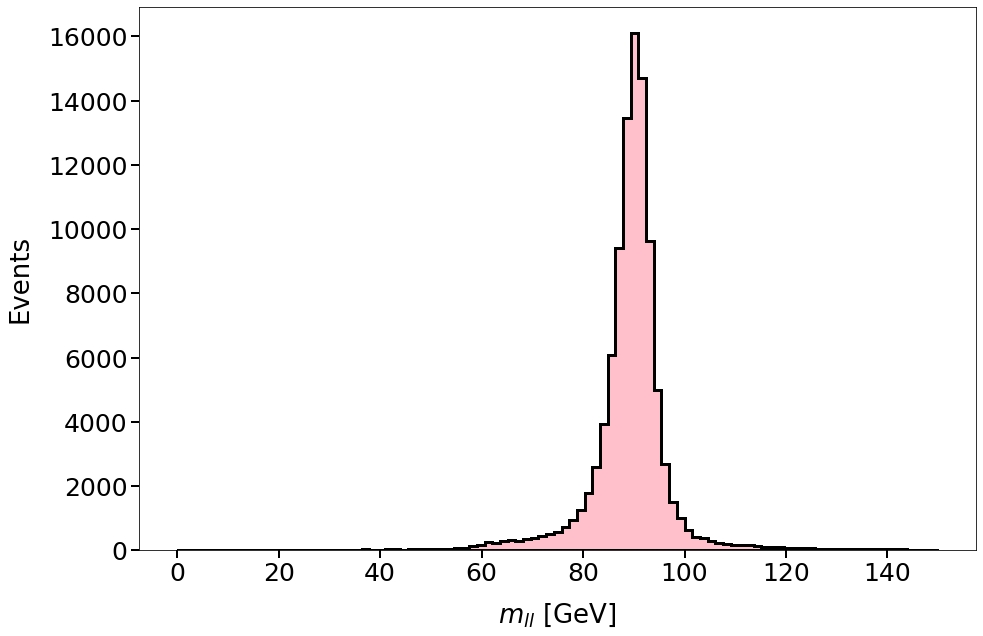

In [135]:
fig, ax = make_fig(xTitle="$m_{ll}$ [GeV]",yTitle=yTitle)
# Use a different color for data
n, bins, patches = ax.hist(mc_kins[b'Z_m'], np.linspace(0,150,100),linewidth=3,histtype='stepfilled',facecolor='pink',edgecolor="black",linestyle='-')

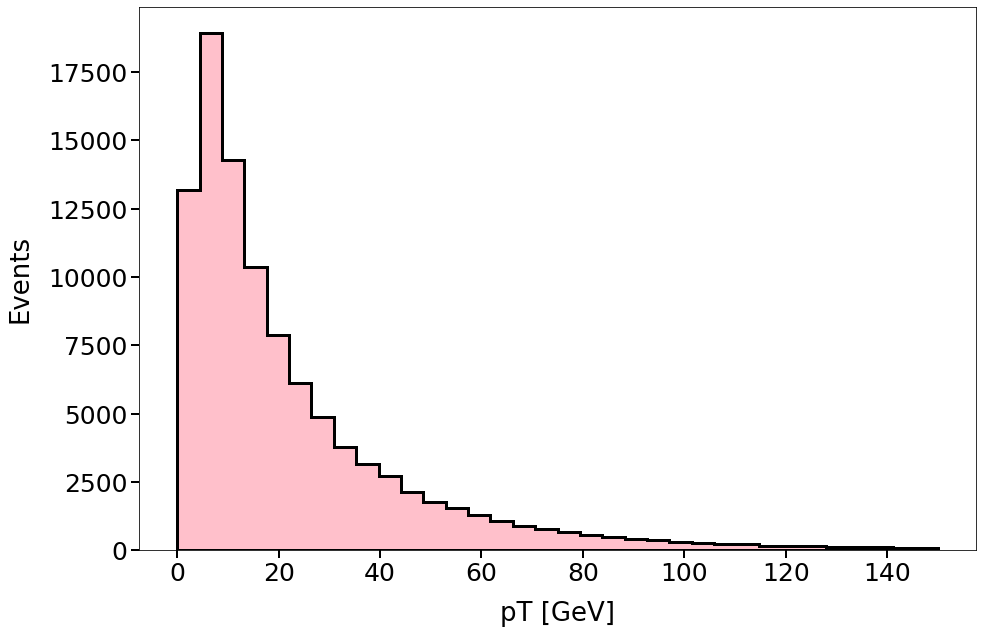

In [11]:
yTitle = "Events"
fig, ax = make_fig(xTitle="pT [GeV]",yTitle=yTitle)
n, bins, patches = ax.hist(mc_kins[b'Z_pt'], np.linspace(0,150,35),linewidth=3,histtype='stepfilled',facecolor='pink',edgecolor="black",linestyle='-')

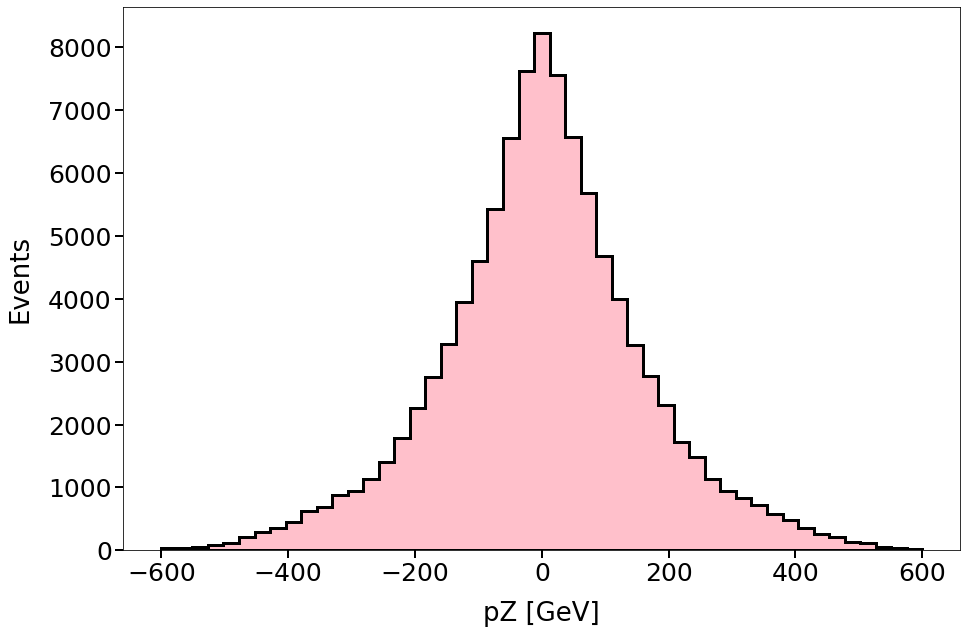

In [12]:
yTitle = "Events"
fig, ax = make_fig(xTitle="pZ [GeV]",yTitle=yTitle)
n, bins, patches = ax.hist(mc_kins[b'Z_pz'], np.linspace(-600,600,50),linewidth=3,histtype='stepfilled',facecolor='pink',edgecolor="black",linestyle='-')

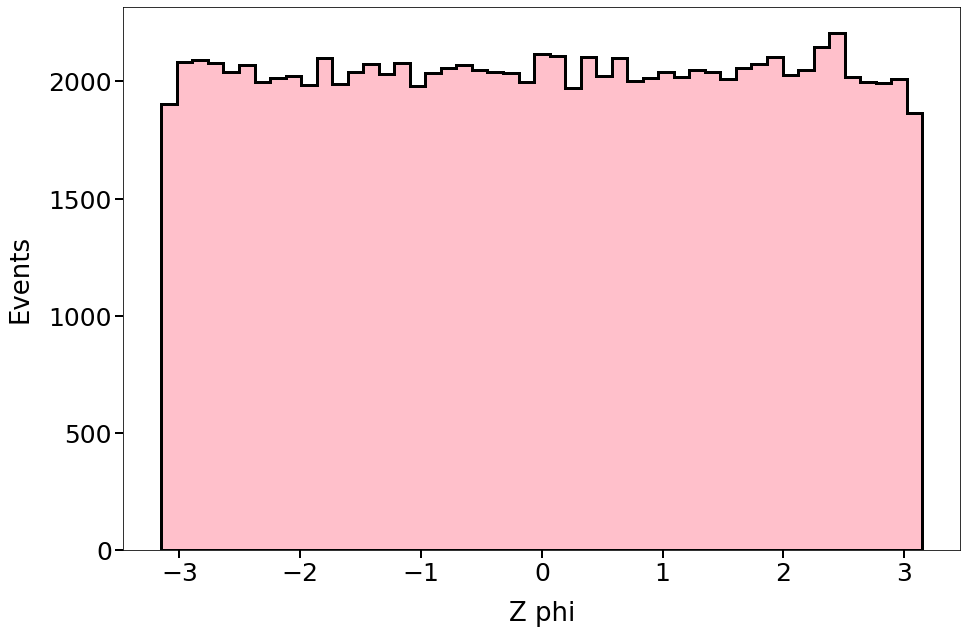

In [144]:
yTitle = "Events"
fig, ax = make_fig(xTitle="Z phi",yTitle=yTitle)
mc_kins[b'Z_phi'] = np.arctan2(mc_kins[b'Z_px'],mc_kins[b'Z_py'])
n, bins, patches = ax.hist(mc_kins[b'Z_phi'], np.linspace(-3.15,3.15,50),linewidth=3,histtype='stepfilled',facecolor='pink',edgecolor="black",linestyle='-')

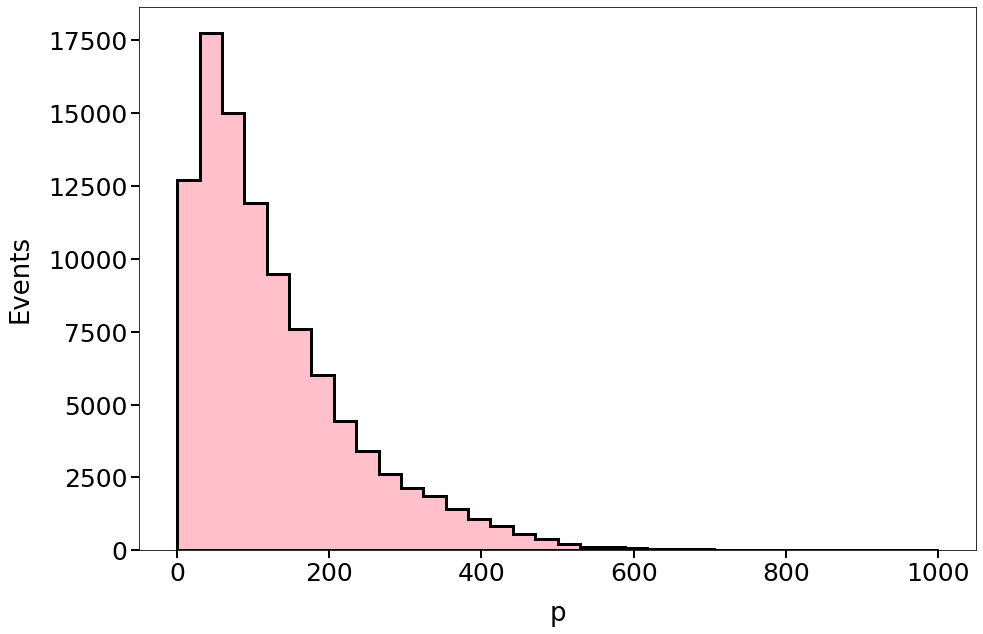

In [14]:
mc_kins[b'Z_p'] = np.sqrt(mc_kins[b'Z_px']**2+mc_kins[b'Z_py']**2+mc_kins[b'Z_pz']**2)
fig, ax = make_fig(xTitle="p",yTitle=yTitle)
n, bins, patches = ax.hist(mc_kins[b'Z_p'], np.linspace(0,1000,35),linewidth=3,histtype='stepfilled',facecolor='pink',edgecolor="black",linestyle='-')

<ipython-input-150-18679270cff2>:3: RuntimeWarning: divide by zero encountered in arctanh
  mc_kins[b'Z_eta'] = np.arctanh(mc_kins[b'Z_pz']/mc_kins[b'Z_p'])


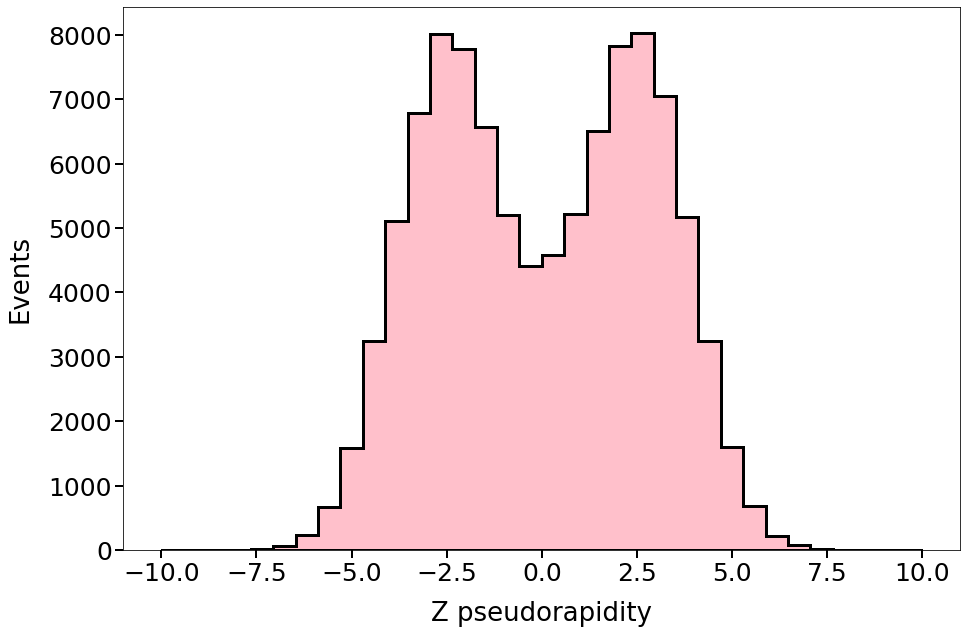

In [150]:
yTitle = "Events"
fig, ax = make_fig(xTitle="Z pseudorapidity",yTitle=yTitle)
mc_kins[b'Z_eta'] = np.arctanh(mc_kins[b'Z_pz']/mc_kins[b'Z_p'])
n, bins, patches = ax.hist(mc_kins[b'Z_eta'], np.linspace(-10,10.,35),linewidth=3,histtype='stepfilled',facecolor='pink',edgecolor="black",linestyle='-')                          

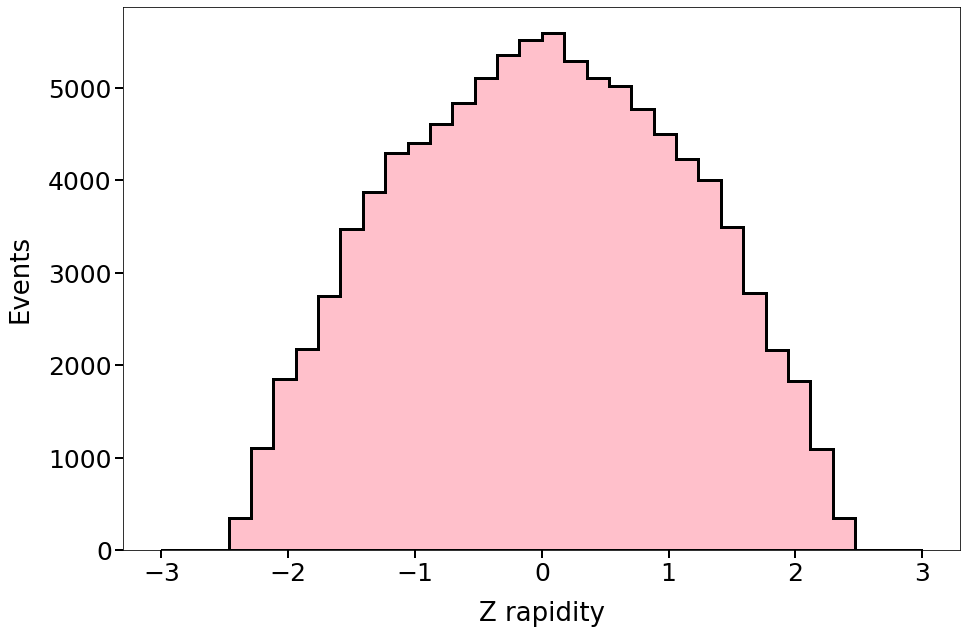

In [151]:
fig, ax = make_fig(xTitle="Z rapidity",yTitle=yTitle)
mc_kins[b'Z_y'] = 0.5*np.log((mc_kins[b'Z_E']+mc_kins[b'Z_pz'])/(mc_kins[b'Z_E']-mc_kins[b'Z_pz']))
n, bins, patches = ax.hist(mc_kins[b'Z_y'], np.linspace(-3,3.,35),linewidth=3,histtype='stepfilled',facecolor='pink',edgecolor="black",linestyle='-')

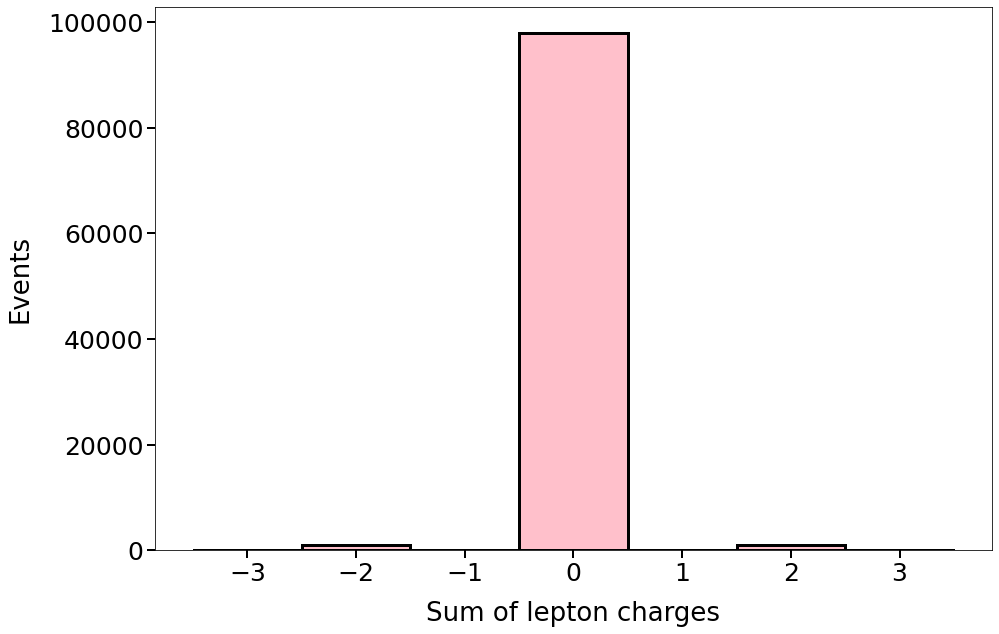

In [53]:
fig, ax = make_fig(xTitle="Sum of lepton charges",yTitle=yTitle)
n, bins, patches = ax.hist(mc_kins[b'Z_chargesum'], np.linspace(-3.5,3.5,8),linewidth=3,histtype='stepfilled',facecolor='pink',edgecolor="black",linestyle='-')

## Data
- let's try to isolate the Z in data. We can do this by cutting on the Z peak.

In [123]:
kins[b'lep_px'] = kins[b'lep_pt']*np.cos( kins[b'lep_phi']) * GeVperMeV
kins[b'lep_py'] = kins[b'lep_pt']*np.sin( kins[b'lep_phi']) * GeVperMeV
kins[b'lep_pz'] = kins[b'lep_pt']*np.sinh( kins[b'lep_eta']) * GeVperMeV
kins[b'lep_E_GeV']  = kins[b'lep_E'] * GeVperMeV

In [124]:
kins[b'dilep_px'] = np.array([ np.sum(i) for i in kins[b'lep_px'] ] )
kins[b'dilep_py'] = np.array([ np.sum(i) for i in kins[b'lep_py'] ] )
kins[b'dilep_pz'] = np.array([ np.sum(i) for i in kins[b'lep_pz'] ] )

In [125]:
kins[b'dilep_pt'] = np.sqrt(kins[b'dilep_px']**2+kins[b'dilep_py']**2)
kins[b'dilep_p']  = np.sqrt(kins[b'dilep_pt']**2+kins[b'dilep_pz']**2)
kins[b'dilep_E']  = np.array([ np.sum(i) for i in kins[b'lep_E_GeV'] ] )
kins[b'dilep_chargesum'] = np.array([ np.sum(i) for i in kins[b'lep_charge'] ] )

In [138]:
kins[b'dilep_m'] = np.sqrt(kins[b'dilep_E']**2 - kins[b'dilep_p']**2)
kins[b'dilep_phi'] = np.arctan2(kins[b'dilep_px'],kins[b'dilep_py'])
kins[b'dilep_eta'] = np.arctanh(kins[b'dilep_pz']/kins[b'dilep_p'])
kins[b'dilep_y'] = 0.5*np.log((kins[b'dilep_E']+kins[b'dilep_pz'])/(kins[b'dilep_E']-kins[b'dilep_pz']))


<ipython-input-138-6a32421c8169>:1: RuntimeWarning: invalid value encountered in sqrt
  kins[b'dilep_m'] = np.sqrt(kins[b'dilep_E']**2 - kins[b'dilep_p']**2)
<ipython-input-138-6a32421c8169>:3: RuntimeWarning: divide by zero encountered in arctanh
  kins[b'dilep_eta'] = np.arctanh(kins[b'dilep_pz']/kins[b'dilep_p'])


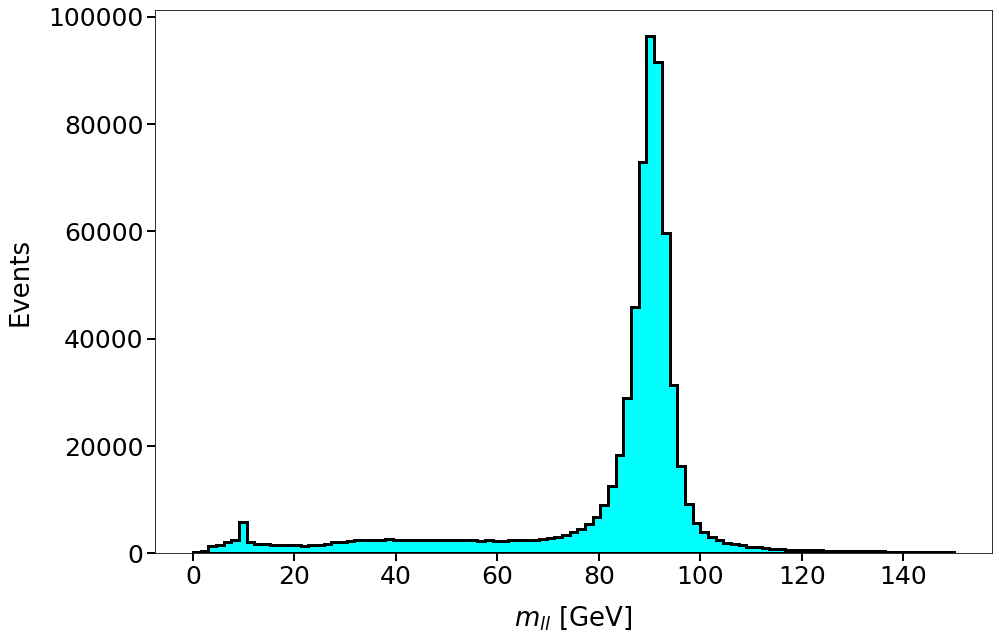

In [128]:
fig, ax = make_fig(xTitle="$m_{ll}$ [GeV]",yTitle=yTitle)

# Use a different color for data
n, bins, patches = ax.hist(kins[b'dilep_m'], np.linspace(0,150,100),linewidth=3,histtype='stepfilled',facecolor='aqua',edgecolor="black",linestyle='-')

In [129]:
# find dilepton pairs which are in the Z peak
Z_indices = np.where( (kins[b'dilep_m']>80.) & (kins[b'dilep_m']<100.) & (kins[b'dilep_chargesum']==0))

# in order to compare to MC, let's apply the same cut
Z_mc_indices = np.where( (mc_kins[b'Z_m']>80.) & (mc_kins[b'Z_m']<100.) & (mc_kins[b'Z_chargesum']==0))


In [153]:
# A bunch of arrays with the Z cut
data_Z_pt = np.take(kins[b'dilep_pt'],Z_indices[0])
mc_Z_pt   = np.take(mc_kins[b'Z_pt'],Z_mc_indices[0])
data_Z_pz = np.take(kins[b'dilep_pz'],Z_indices[0])
mc_Z_pz   = np.take(mc_kins[b'Z_pz'],Z_mc_indices[0])
data_Z_phi = np.take(kins[b'dilep_phi'],Z_indices[0])
mc_Z_phi   = np.take(mc_kins[b'Z_phi'],Z_mc_indices[0])
data_Z_eta = np.take(kins[b'dilep_eta'],Z_indices[0])
mc_Z_eta   = np.take(mc_kins[b'Z_eta'],Z_mc_indices[0])
data_Z_y = np.take(kins[b'dilep_y'],Z_indices[0])
mc_Z_y   = np.take(mc_kins[b'Z_y'],Z_mc_indices[0])

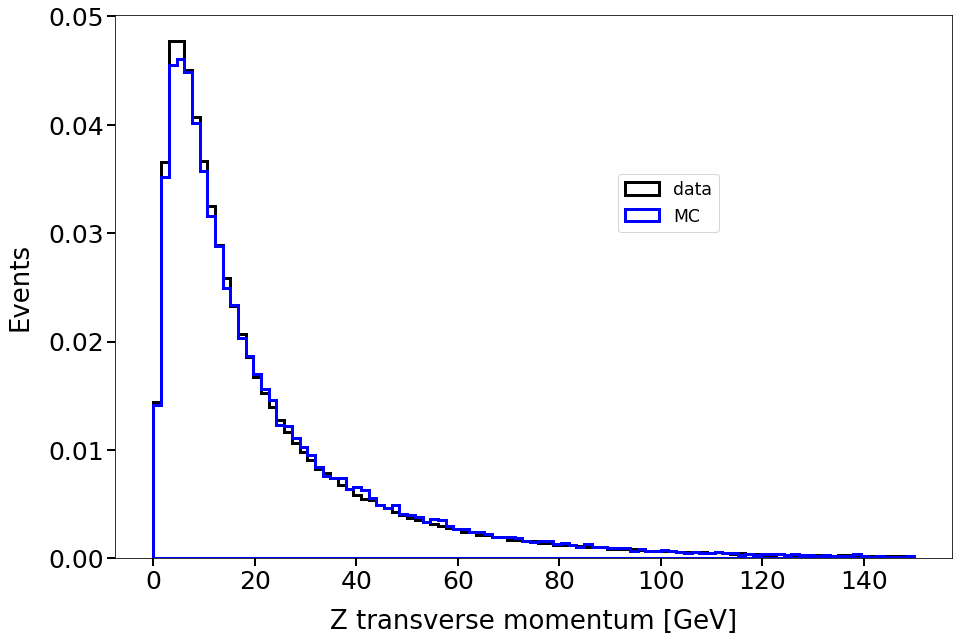

In [164]:
xtitle  = "Z transverse momentum [GeV]"
ytitle  = "Events"
fig, ax = make_fig(xTitle=xtitle,yTitle=ytitle)
nbins   = 100 # number of bins in histogram
xlow    = 0
xhigh   = 150
xbins    = np.linspace(xlow, xhigh,nbins)
n, bins, patches    = ax.hist(data_Z_pt, xbins, linewidth=3,histtype='stepfilled',facecolor='none',edgecolor="black",linestyle='-', label="data",density=True)
n2, bins2, patches2 = ax.hist(mc_Z_pt, xbins, linewidth=3,histtype='stepfilled',facecolor='none',edgecolor="blue",linestyle='-',label="MC",density=True)
plt.legend(loc=(0.6,0.6),fontsize="xx-large")

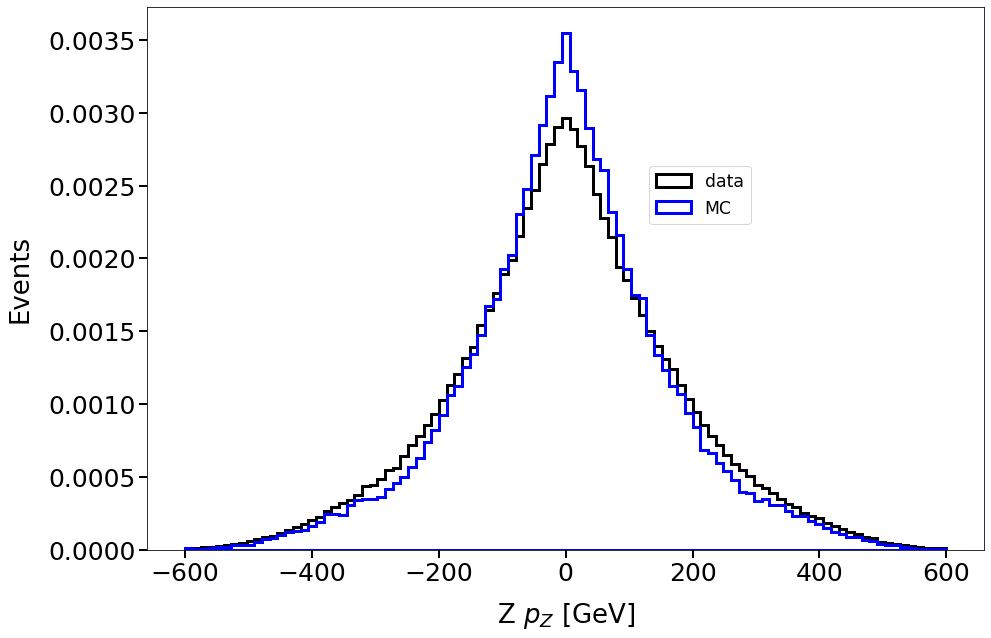

In [141]:
xtitle  = "Z $p_Z$ [GeV]"
ytitle  = "Events"
fig, ax = make_fig(xTitle=xtitle,yTitle=ytitle)
nbins   = 100 # number of bins in histogram
xlow    = -600
xhigh   = 600
xbins    = np.linspace(xlow, xhigh,nbins)
n, bins, patches    = ax.hist(data_Z_pz, xbins, linewidth=3,histtype='stepfilled',facecolor='none',edgecolor="black",linestyle='-', label="data",density=True)
n2, bins2, patches2 = ax.hist(mc_Z_pz, xbins, linewidth=3,histtype='stepfilled',facecolor='none',edgecolor="blue",linestyle='-',label="MC",density=True)
plt.legend(loc=(0.6,0.6),fontsize="xx-large")

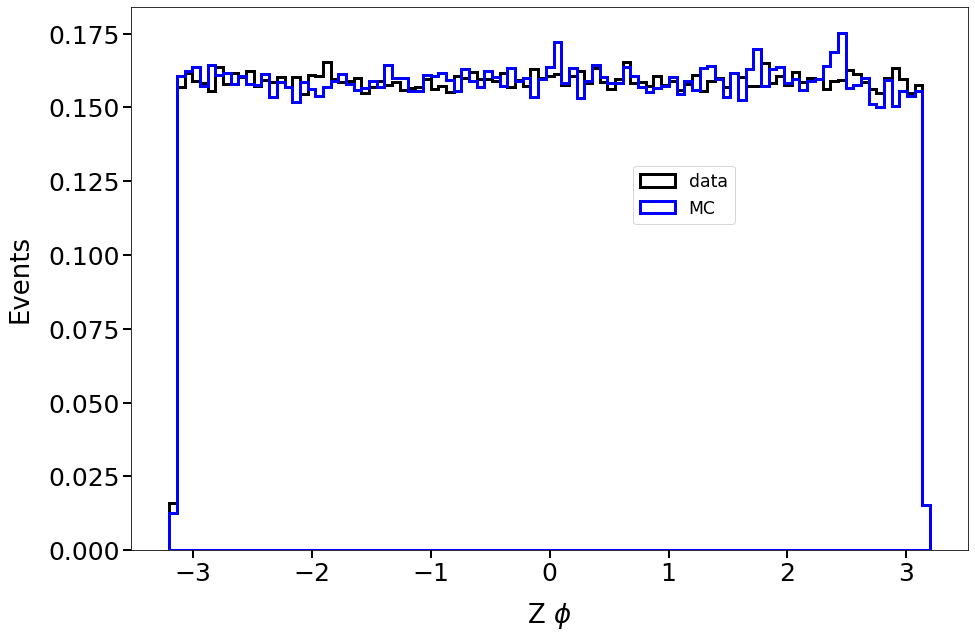

In [147]:
xtitle  = "Z $\phi$ "
ytitle  = "Events"
fig, ax = make_fig(xTitle=xtitle,yTitle=ytitle)
nbins   = 100 # number of bins in histogram
xlow    = -3.2
xhigh   = 3.2
xbins    = np.linspace(xlow, xhigh,nbins)
n, bins, patches    = ax.hist(data_Z_phi, xbins, linewidth=3,histtype='stepfilled',facecolor='none',edgecolor="black",linestyle='-', label="data",density=True)
n2, bins2, patches2 = ax.hist(mc_Z_phi, xbins, linewidth=3,histtype='stepfilled',facecolor='none',edgecolor="blue",linestyle='-',label="MC",density=True)
plt.legend(loc=(0.6,0.6),fontsize="xx-large")

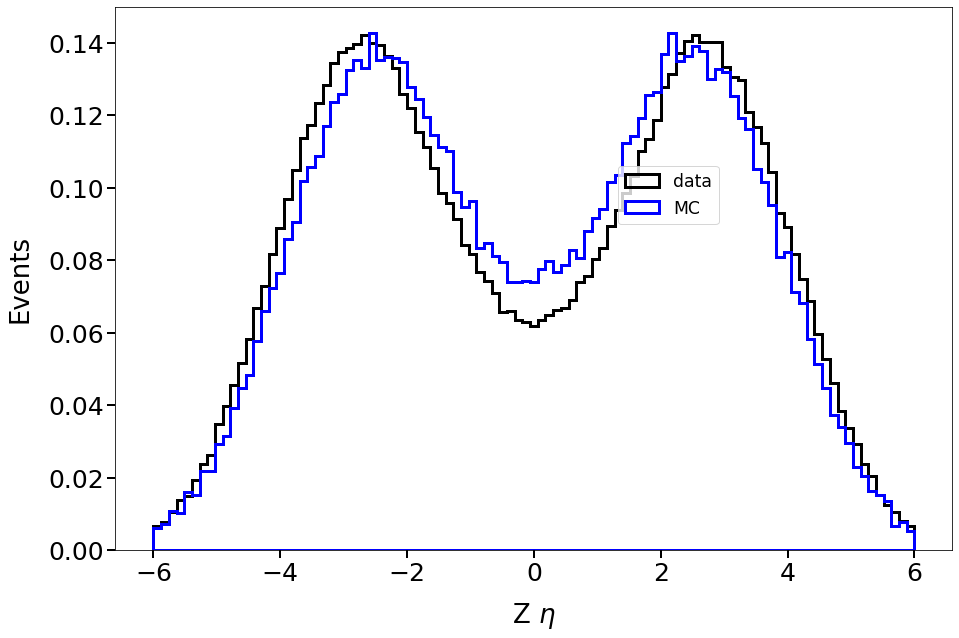

In [156]:
xtitle  = "Z $\eta$ "
ytitle  = "Events"
fig, ax = make_fig(xTitle=xtitle,yTitle=ytitle)
nbins   = 100 # number of bins in histogram
xlow    = -6
xhigh   = 6
xbins    = np.linspace(xlow, xhigh,nbins)
n, bins, patches    = ax.hist(data_Z_eta, xbins, linewidth=3,histtype='stepfilled',facecolor='none',edgecolor="black",linestyle='-', label="data",density=True)
n2, bins2, patches2 = ax.hist(mc_Z_eta, xbins, linewidth=3,histtype='stepfilled',facecolor='none',edgecolor="blue",linestyle='-',label="MC",density=True)
plt.legend(loc=(0.6,0.6),fontsize="xx-large")

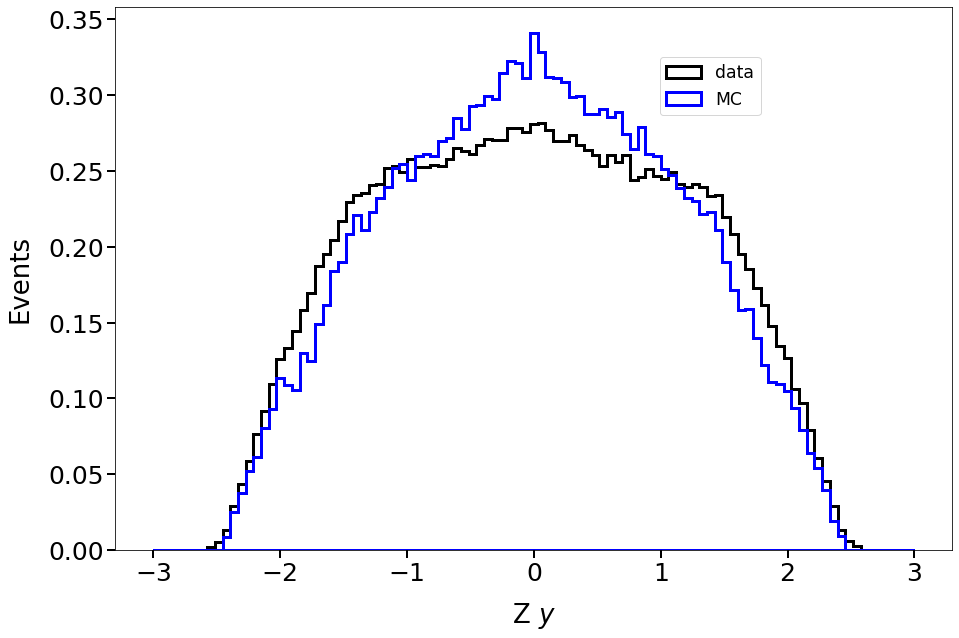

In [160]:
xtitle  = "Z $y$ "
ytitle  = "Events"
fig, ax = make_fig(xTitle=xtitle,yTitle=ytitle)
nbins   = 100 # number of bins in histogram
xlow    = -3
xhigh   = 3
xbins    = np.linspace(xlow, xhigh,nbins)
n, bins, patches    = ax.hist(data_Z_y, xbins, linewidth=3,histtype='stepfilled',facecolor='none',edgecolor="black",linestyle='-', label="data",density=True)
n2, bins2, patches2 = ax.hist(mc_Z_y, xbins, linewidth=3,histtype='stepfilled',facecolor='none',edgecolor="blue",linestyle='-',label="MC",density=True)
plt.legend(loc=(0.65,0.8),fontsize="xx-large")

## Missing Transverse Energy

In [161]:
lep1_file_name = "../data/ATLAS/data_A.1lep.small.root"
lep1_file      = uproot.open(lep1_file_name)

In [ ]:
tree = b'mini;1'
branches = [ b'lep_pt', b'met_et' ]
kins_1lep = {}
for branch in branches:
    kins_1lep[branch] = lep1_file[tree].array(branch)

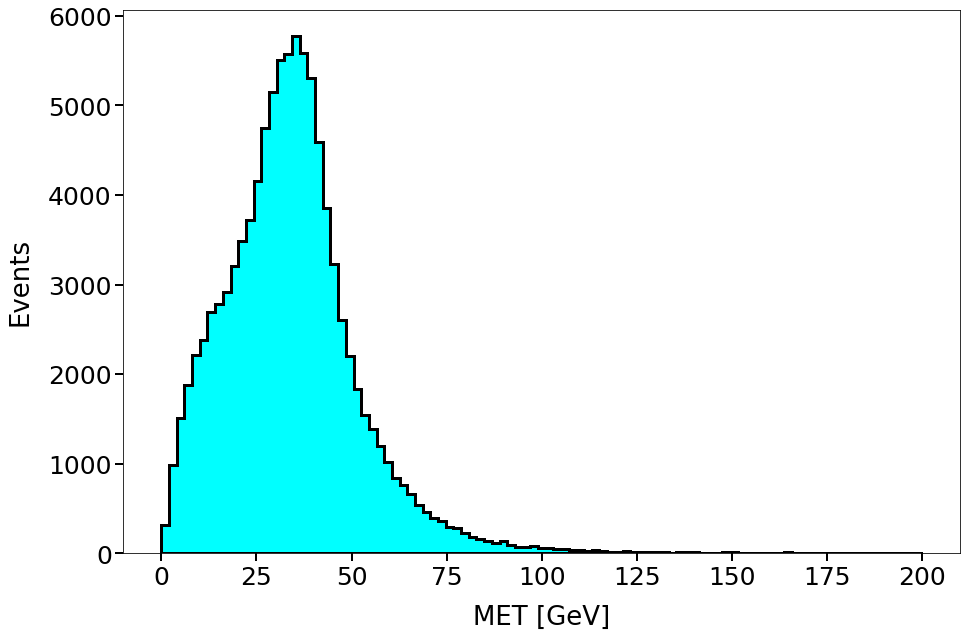

In [170]:
fig, ax = make_fig(xTitle="MET [GeV]",yTitle=yTitle)

# Use a different color for data
n, bins, patches = ax.hist(kins_1lep[b'met_et']*GeVperMeV, np.linspace(0,200,100),linewidth=3,histtype='stepfilled',facecolor='aqua',edgecolor="black",linestyle='-')

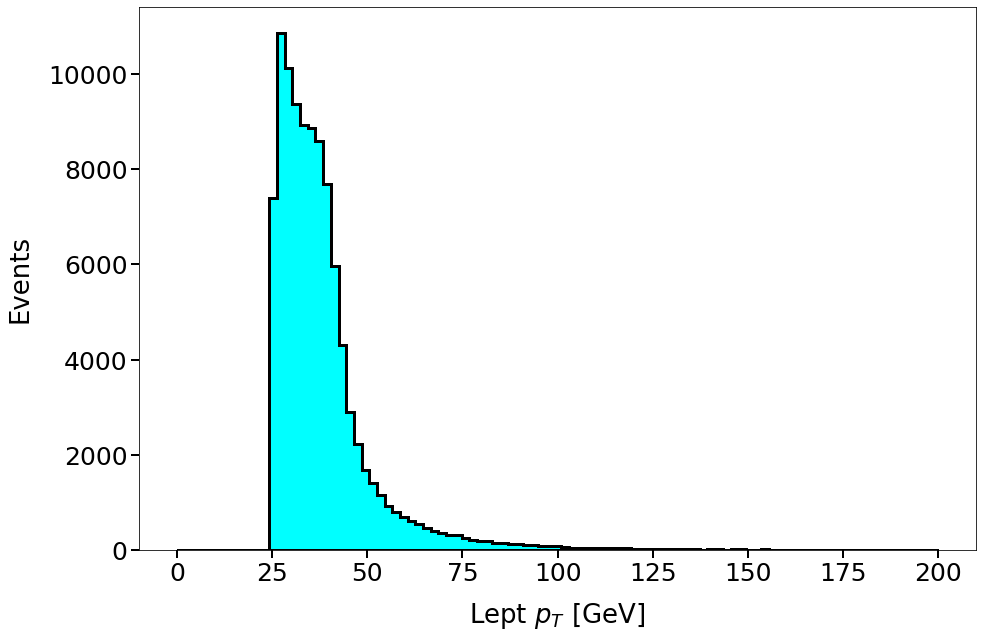

In [172]:
fig, ax = make_fig(xTitle="Lept $p_T$ [GeV]",yTitle=yTitle)

# Use a different color for data
n, bins, patches = ax.hist(kins_1lep[b'lep_pt'].flatten()*GeVperMeV, np.linspace(0,200,100),linewidth=3,histtype='stepfilled',facecolor='aqua',edgecolor="black",linestyle='-')

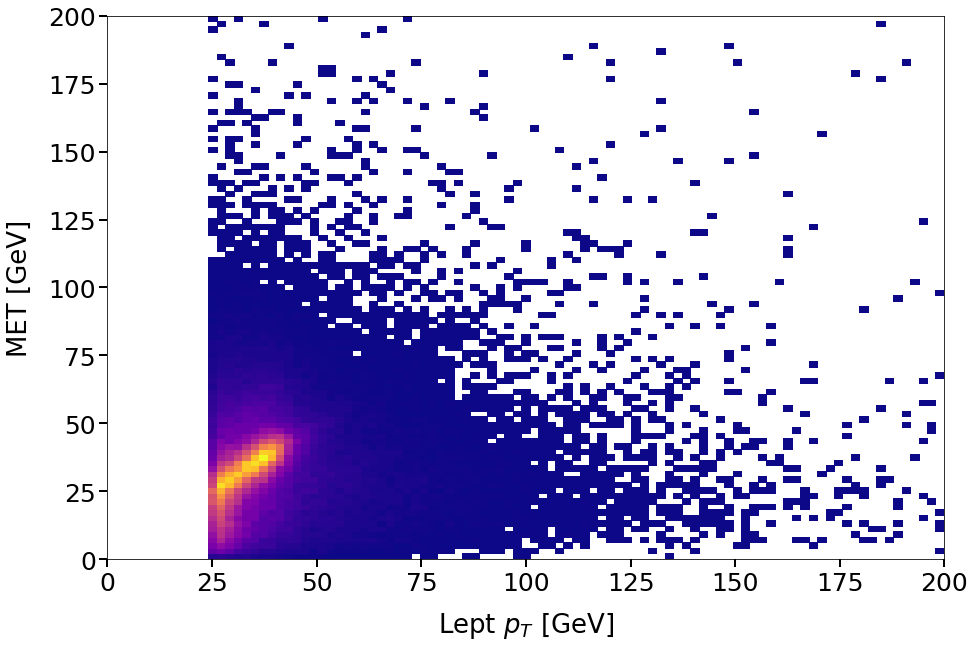

In [182]:
fig, ax = make_fig(xTitle="Lept $p_T$ [GeV]",yTitle="MET [GeV]")

n, xedges, yedges, patches = ax.hist2d(kins_1lep[b'lep_pt'].flatten()*GeVperMeV, kins_1lep[b'met_et'].flatten()*GeVperMeV, np.linspace(0,200,100),cmin=0.1,cmap="plasma")

